# sampling

In [2]:
import cv2
import os

In [2]:
def square(img):

  shape = img.shape[0], img.shape[1]
  # print(shape)  
  min_shape = min(shape)

  if min_shape == shape[0]:
    ww = round((shape[1] - shape[0]) / 2)
    result = img[0:min_shape, ww:ww+min_shape]

  else:
    hh = round((shape[0] - shape[1]) / 2)
    result = img[hh:hh+ min_shape, 0:min_shape]
    # print(hh)



  return result

In [3]:
# os.mkdir('.\Dataset\img')
f = []

In [4]:
# batch4\KKF\KKF\KKF_ถ่ายรูป&คุยโทรศัพท์_1.mp4
path = './batch4/BKF/BKF/BKF_2.avi'

In [5]:
cap = cv2.VideoCapture(path)

# Get the frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f"{fps} fps")

# Get the total numer of frames in the video. value same as image frame
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(f"{frame_count} frames")

#Time of video(sec)
duration = frame_count / fps
print(f"{duration} sec")

15.0 fps
6240.0 frames
416.0 sec


In [6]:
f = []
cap = cv2.VideoCapture(path)

# Get the frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f"{fps} fps")

# Get the total numer of frames in the video. value same as image frame
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(f"{frame_count} frames")

#Time of video(sec)
duration = frame_count / fps
print(f"{duration} sec")

count = 69
counter = 0
index = 0
while cap.isOpened():
    ret, image = cap.read()
    counter = counter + 1

    if not ret:
      break
    
    # if len(f) >= 300:
    #   count = 100
    
    # skip frame
    if counter == count:
      index = index + 1
      cv2.imwrite('./raw_img/batch4/BKF3/' + 'BKF-3-batch4_phone_ ' + str(index) + '.jpg', image) #1 is morning, 2 is afternoon, 3 is evening

    elif counter > count:
      counter = 0
      


    cv2.waitKey(1) & 0xff

  # <video no>_<class>_ (idx).jpg
  # video no: <location>-<cloth_color>-<class>
  # class : phone, no-phone
 

15.0 fps
6240.0 frames
416.0 sec


In [9]:
print(index)

135


In [39]:
len(f)

285

In [40]:
index = 0

for i in range(len(f)):
  index = index + 1
  img = f[i]

  # preprocess
  # img = square(img)


  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  cv2.imwrite('./BKF/' + 'BKF-3_phone_ ' + str(index) + '.jpg', img) #1 is morning, 2 is afternoon, 3 is evening

  # <video no>_<class>_ (idx).jpg
  # class : phone, no-phone

# crop

In [20]:
import cv2

In [4]:
def square(img):

  shape = img.shape[0], img.shape[1]
  # print(shape)  
  min_shape = min(shape)

  if min_shape == shape[0]:
    ww = round((shape[1] - shape[0]) / 2)
    result = img[0:min_shape, ww:ww+min_shape]
    print("ww is: ",ww, min_shape)

  else:
    hh = round((shape[0] - shape[1]) / 2)
    result = img[hh:hh+ min_shape, 0:min_shape]
    print("hh is: ",hh)



  return result

raw image:  (2600, 2600, 3)
ww is:  0 2600
raw : (2600, 2600, 3), crop : (2400, 2600, 3)


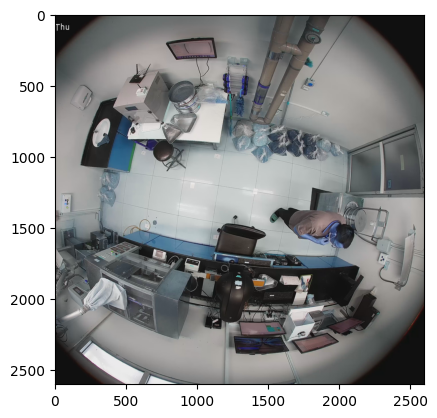

In [18]:
### change : location_focus
### trial & check : img_manual

import matplotlib.pyplot as plt
# location_focus = "RBF"
# img = cv2.imread(f'{location_focus}/sampling/choose/RBF-BLUE-3_phone_ 8.jpg')

# location_focus = "raw_img/batch4/KKF"
location_focus = os.path.join("raw_img", "batch4")
img = cv2.imread(f'{location_focus}/LPF/LPF-1-batch4_phone_ 6.jpg')
print("raw image: ",img.shape)
# img

img_sqt = square(img) 


# img_manual = img[200:2800, 800:3400] ### y:y2, x:x2 # BKF, LPF
# img_manual = img[50:1000, 480:1430] ### y:y2, x:x2 # KKF
# img_manual = img[0:3000, 500:3500] ### y:y2, x:x2 # KRF
# img_manual = img[0:3000, 500:3500] ### y:y2, x:x2 # RBF

plt.imshow(img)
print(f"raw : {img_sqt.shape}, crop : {img_manual.shape}")

In [9]:
import os
# folder_path = os.path.join(location_focus, 'sampling','choose')
# source = os.path.join(location_focus,'sampling','choose')
folder_path = os.path.join(location_focus, 'BKF3')
source  = os.path.join(location_focus, 'BKF3')
des =  os.path.join(location_focus, 'crop')
file_arr = os.listdir(folder_path)
file_arr[:5]

['BKF-3-batch4_phone_ 1.jpg',
 'BKF-3-batch4_phone_ 10.jpg',
 'BKF-3-batch4_phone_ 11.jpg',
 'BKF-3-batch4_phone_ 12.jpg',
 'BKF-3-batch4_phone_ 13.jpg']

In [10]:
### change : img_manual

from tqdm import tqdm
count = 0

for photo_name in tqdm(file_arr):
    # if photo_name.endswith('.jpg'):
    # print(photo_name)
    if os.path.isdir(des):
       

        img = cv2.imread(os.path.join(source,photo_name))
        img_manual = img[200:2800, 800:3400] ### y:y2, x:x2 # BKF
        
        if count == 0:
            print(img_manual.shape)
            count = 1

        cv2.imwrite(os.path.join(des,photo_name), img_manual)
    else:
        print(photo_name)
        print("is not have folder name :", des)
        break


  1%|          | 1/89 [00:00<00:13,  6.61it/s]

(2600, 2600, 3)


100%|██████████| 89/89 [00:12<00:00,  6.99it/s]


In [25]:
os.path.isdir(des)

True

In [26]:
des

'raw_img\\batch4\\KKF\\crop'